In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Read the CSV file from Google Drive
ipl_auction_df = pd.read_csv('/content/drive/My Drive/ipl_auction.csv')


Mounted at /content/drive


In [2]:
ipl_auction_df.head(7)

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000
5,6,"Bailey, GJ",2,AUS,CSK,Batsman,0,0,172,72.26,...,95.45,0,0,0,0.00,0.00,0.00,2009,50000,50000
6,7,"Balaji, L",2,IND,CSK+,Bowler,51,27,120,78.94,...,72.22,1,1342,52,25.81,7.98,19.40,2011,100000,500000


In [3]:
ipl_auction_df.groupby('AGE')['SOLD PRICE'].mean()


AGE
1    720250.000000
2    484534.883721
3    520178.571429
Name: SOLD PRICE, dtype: float64

In [4]:
soldprice_by_age=ipl_auction_df.groupby('AGE')['SOLD PRICE'].mean().reset_index()
print(soldprice_by_age)

   AGE     SOLD PRICE
0    1  720250.000000
1    2  484534.883721
2    3  520178.571429


In [5]:
soldprice_by_age_role=ipl_auction_df.groupby(['AGE','PLAYING ROLE'])['SOLD PRICE'].mean().reset_index()
print(soldprice_by_age_role)


    AGE PLAYING ROLE    SOLD PRICE
0     1   Allrounder  5.875000e+05
1     1      Batsman  1.110000e+06
2     1       Bowler  5.177143e+05
3     2   Allrounder  4.494000e+05
4     2      Batsman  6.547619e+05
5     2       Bowler  3.979310e+05
6     2    W. Keeper  4.677273e+05
7     3   Allrounder  7.666667e+05
8     3      Batsman  4.576923e+05
9     3       Bowler  4.143750e+05
10    3    W. Keeper  7.000000e+05


In [6]:
soldprice_comparison=soldprice_by_age_role.merge(soldprice_by_age,on='AGE',how='outer')
print(soldprice_comparison)

    AGE PLAYING ROLE  SOLD PRICE_x   SOLD PRICE_y
0     1   Allrounder  5.875000e+05  720250.000000
1     1      Batsman  1.110000e+06  720250.000000
2     1       Bowler  5.177143e+05  720250.000000
3     2   Allrounder  4.494000e+05  484534.883721
4     2      Batsman  6.547619e+05  484534.883721
5     2       Bowler  3.979310e+05  484534.883721
6     2    W. Keeper  4.677273e+05  484534.883721
7     3   Allrounder  7.666667e+05  520178.571429
8     3      Batsman  4.576923e+05  520178.571429
9     3       Bowler  4.143750e+05  520178.571429
10    3    W. Keeper  7.000000e+05  520178.571429


In [7]:
soldprice_comparison.rename(columns={'SOLD PRICE_x':'SOLD_PRICE_AGE_ROLE','SOLD PRICE_y':'SOLD_PRICE_AGE'},inplace=True)
soldprice_comparison.head(4)

,AGE,PLAYING ROLE,SOLD_PRICE_AGE_ROLE,SOLD_PRICE_AGE
0,1,Allrounder,5.875000e+05,720250.000000
1,1,Batsman,1.110000e+06,720250.000000
2,1,Bowler,5.177143e+05,720250.000000
3,2,Allrounder,4.494000e+05,484534.883721


In [8]:
ipl_auction_df[ipl_auction_df['SIXERS']>80][['PLAYER NAME','SIXERS']]

,PLAYER NAME,SIXERS
26,"Gayle, CH",129
28,"Gilchrist, AC",86
82,"Pathan, YK",81
88,"Raina, SK",97
97,"Sharma, RG",82


In [9]:
ipl_auction_df.drop('SR-BL',inplace=True,axis=1)
ipl_auction_df.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'AUCTION YEAR', 'BASE PRICE', 'SOLD PRICE'],
      dtype='object')

In [10]:
autos = pd.read_csv('/content/drive/My Drive/auto-mpg.data-original', sep = '\s+', header = None)
autos.head(10)

,0,1,2,3,4,5,6,7,8
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,chevrolet impala
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,plymouth fury iii
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,pontiac catalina
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1.0,amc ambassador dpl


In [11]:
autos.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']


In [12]:
autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [13]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model_year    406 non-null    float64
 7   origin        406 non-null    float64
 8   car_name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


In [14]:
import matplotlib.pyplot as plt
import seaborn as sn
# To display the plots on Jupyter Notebook, we need to provide a directive %matplotlib inline
get_ipython().run_line_magic('matplotlib', 'inline')

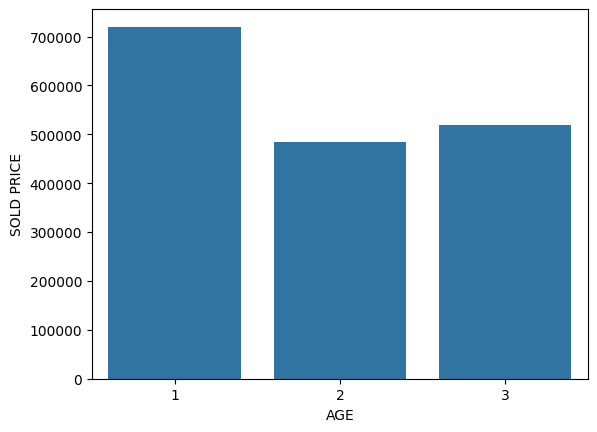

In [15]:
sn.barplot(x='AGE', y='SOLD PRICE', data=soldprice_by_age);

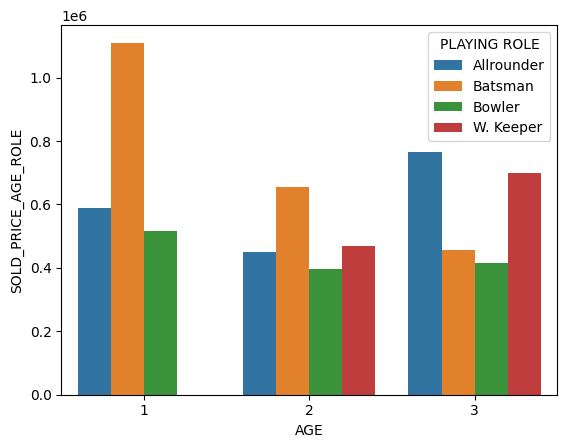

In [16]:
sn.barplot(x='AGE', y='SOLD_PRICE_AGE_ROLE', hue='PLAYING ROLE', data=soldprice_comparison);


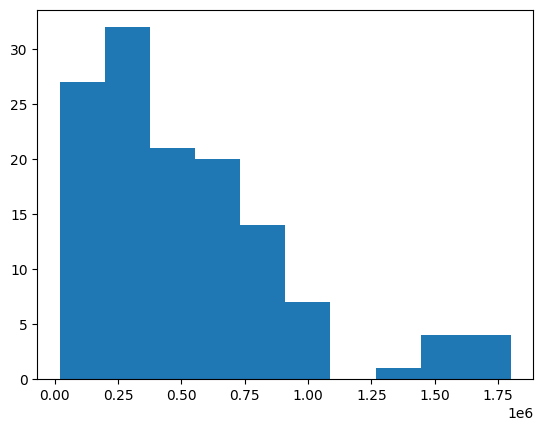

In [17]:
plt.hist(ipl_auction_df['SOLD PRICE']);


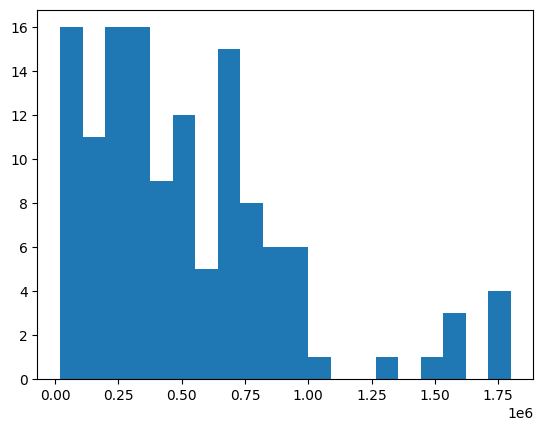

In [18]:
plt.hist(ipl_auction_df['SOLD PRICE'], bins=20);


<ipython-input-19-4c95fbf4414d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(ipl_auction_df['SOLD PRICE']);


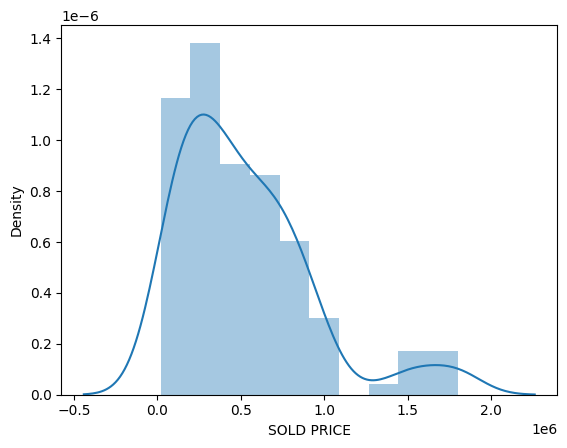

In [19]:
sn.distplot(ipl_auction_df['SOLD PRICE']);


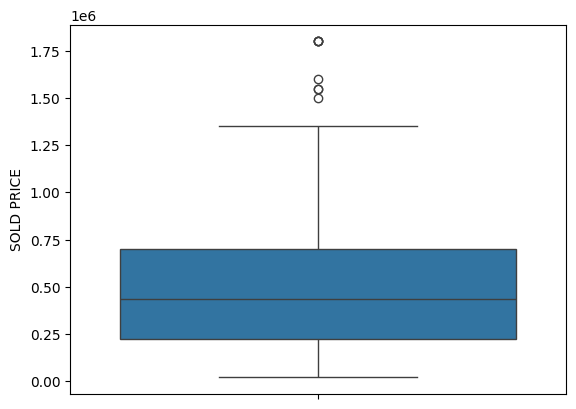

In [20]:
box=sn.boxplot(ipl_auction_df['SOLD PRICE']);


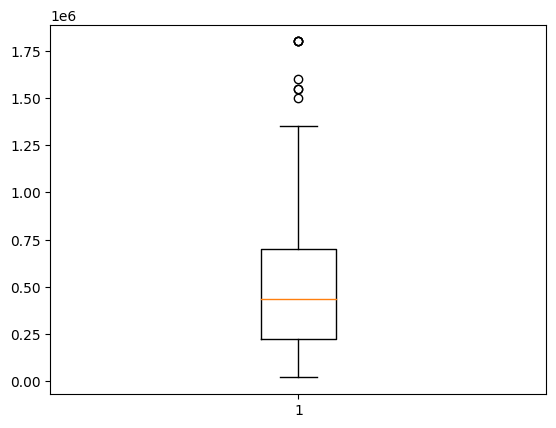

In [21]:
box=plt.boxplot(ipl_auction_df['SOLD PRICE']);


In [22]:
[item.get_ydata()[0] for item in box['caps']]

[20000, 1350000]

In [23]:
[item.get_ydata()[0] for item in box['whiskers']]


[225000.0, 700000.0]

In [24]:
[item.get_ydata()[0] for item in box['medians']]


[437500.0]

In [25]:
ipl_auction_df[ipl_auction_df['SOLD PRICE']>1350000.0][['PLAYER NAME','PLAYING ROLE','SOLD PRICE']]


,PLAYER NAME,PLAYING ROLE,SOLD PRICE
15,"Dhoni, MS",W. Keeper,1500000
23,"Flintoff, A",Allrounder,1550000
50,"Kohli, V",Batsman,1800000
83,"Pietersen, KP",Batsman,1550000
93,"Sehwag, V",Batsman,1800000
111,"Tendulkar, SR",Batsman,1800000
113,"Tiwary, SS",Batsman,1600000
127,Yuvraj Singh,Batsman,1800000


<ipython-input-26-931841e0e674>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(ipl_auction_df[ipl_auction_df['CAPTAINCY EXP']==1]['SOLD PRICE'],color='y',label='Captaincy Experience');
<ipython-input-26-931841e0e674>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(ipl_auction_df[ipl_auction_df[

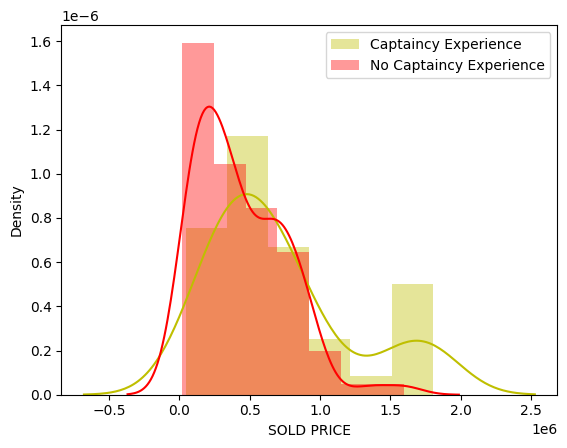

In [26]:
sn.distplot(ipl_auction_df[ipl_auction_df['CAPTAINCY EXP']==1]['SOLD PRICE'],color='y',label='Captaincy Experience');
sn.distplot(ipl_auction_df[ipl_auction_df['CAPTAINCY EXP']==0]['SOLD PRICE'],color='r',label='No Captaincy Experience');
plt.legend();

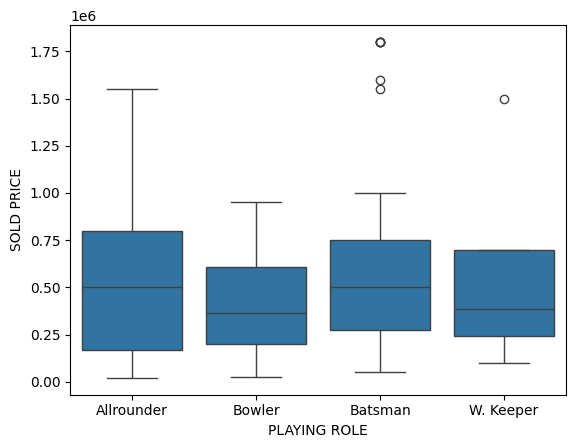

In [27]:
sn.boxplot(x='PLAYING ROLE',y='SOLD PRICE',data=ipl_auction_df);


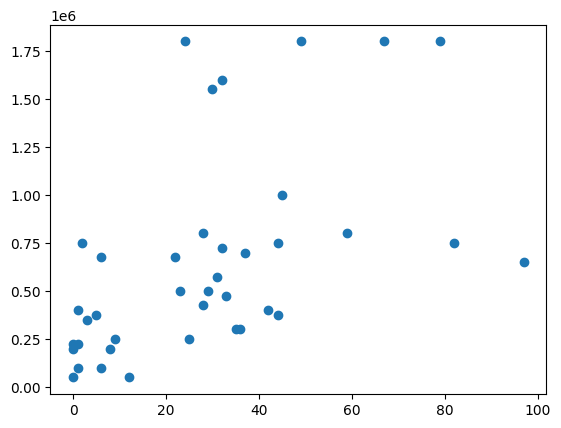

In [28]:
ipl_batsman_df=ipl_auction_df[ipl_auction_df['PLAYING ROLE']=='Batsman']
plt.scatter(x=ipl_batsman_df.SIXERS,y=ipl_batsman_df['SOLD PRICE']);

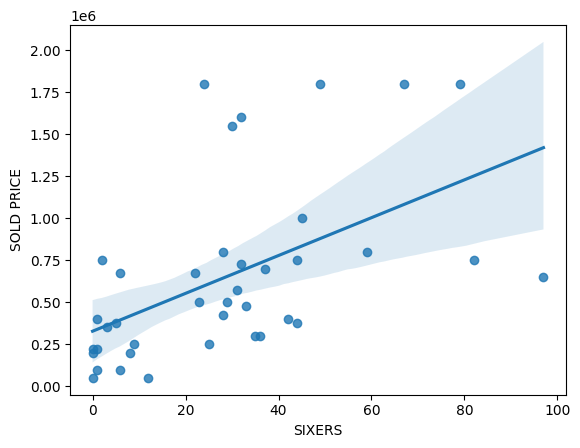

In [29]:
sn.regplot(x='SIXERS',y='SOLD PRICE',data=ipl_batsman_df);


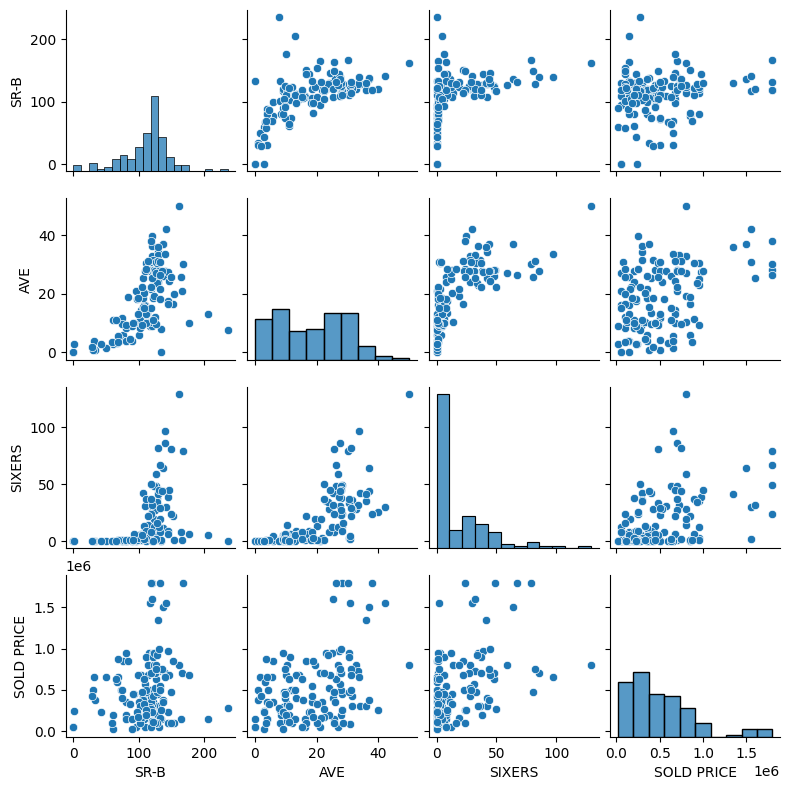

In [30]:
influential_features=['SR-B','AVE','SIXERS','SOLD PRICE']
sn.pairplot(ipl_auction_df[influential_features],height=2);

In [31]:
print(ipl_auction_df[influential_features].corr());


                SR-B       AVE    SIXERS  SOLD PRICE
SR-B        1.000000  0.583579  0.425394    0.184278
AVE         0.583579  1.000000  0.705365    0.396519
SIXERS      0.425394  0.705365  1.000000    0.450609
SOLD PRICE  0.184278  0.396519  0.450609    1.000000


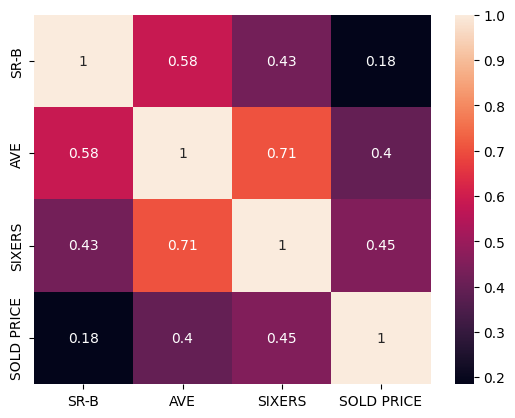

In [32]:
sn.heatmap(ipl_auction_df[influential_features].corr(),annot=True);
